In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [6]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [7]:
import pandas as pd

# Create a DataFrame from the nodes_list dictionary
nodes_df = pd.DataFrame(nodes_list).T

# Reset the index and rename the index column to 'Node'
nodes_df.reset_index(inplace=True)
nodes_df.rename(columns={'index': 'Node'}, inplace=True)

# Display the DataFrame
nodes_df


Node                                 position bandwidth  mobility  \
0     0  (81.94919435002753, 22.002771515434205)         3   0.26712   
1     1   (98.28951369247514, 89.32412910341392)         6  0.155198   
2     2  (79.13863747090667, 15.007246783018102)         6  0.412229   
3     3   (42.79819085191681, 82.01060985301652)         1  0.192452   
4     4  (90.08373579376975, 39.213936121299945)         4  0.952184   
5     5  (42.832020059420515, 97.31146570421286)         2  0.647631   
6     6    (85.4926830236732, 70.30286166191841)        10  0.157379   
7     7   (22.89780120074002, 87.87124572430301)         5  0.807443   
8     8   (78.63838342191761, 68.05259871051729)         1  0.656505   
9     9  (11.605328480347376, 36.39324596344539)         4   0.14368   

  transmission_power packet_loss battery_capacity  
0          14.543173    0.386004        21.836698  
1          11.103399    0.120545        31.915334  
2          18.631823    0.246799        15.435587  
3          14.139456    0.688853        35.549713  
4          15.083241    0.318087        16.448343  
5           7.212308    0.695513        54.785212  
6          14.427517    0.860899        28.843045  
7           7.207781     0.34606        46.525246  
8          11.835669     0.60763        24.560361  
9           8.499666    0.731581         88.66606

In [8]:
nodes_df.to_csv('basic.csv')

In [10]:
df = pd.read_csv('basic.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

Node                                 position  bandwidth  mobility  \
0     0  (81.94919435002753, 22.002771515434205)          3  0.267120   
1     1   (98.28951369247514, 89.32412910341392)          6  0.155198   
2     2  (79.13863747090667, 15.007246783018102)          6  0.412229   
3     3   (42.79819085191681, 82.01060985301652)          1  0.192452   
4     4  (90.08373579376975, 39.213936121299945)          4  0.952184   
5     5  (42.832020059420515, 97.31146570421286)          2  0.647631   
6     6    (85.4926830236732, 70.30286166191841)         10  0.157379   
7     7   (22.89780120074002, 87.87124572430301)          5  0.807443   
8     8   (78.63838342191761, 68.05259871051729)          1  0.656505   
9     9  (11.605328480347376, 36.39324596344539)          4  0.143680   

   transmission_power  packet_loss  battery_capacity  
0           14.543173     0.386004         21.836698  
1           11.103399     0.120545         31.915334  
2           18.631823     0.246799         15.435587  
3           14.139456     0.688853         35.549713  
4           15.083241     0.318087         16.448343  
5            7.212308     0.695513         54.785212  
6           14.427517     0.860899         28.843045  
7            7.207781     0.346060         46.525246  
8           11.835669     0.607630         24.560361  
9            8.499666     0.731581         88.666060

# Bellman Ford

In [16]:
def bellman_ford(source, destination, G, nodes_df):
    if source == destination:
        return [source]

    dist = {node: float('inf') for node in nodes_df['Node']}
    dist[source] = 0
    prev = {node: None for node in nodes_df['Node']}

    # Step 2: Relax edges repeatedly
    for i in range(len(nodes_df) - 1):
        for edge in G.edges():
            u, v = edge
            if dist[u] + (1 / nodes_df.loc[v]['bandwidth']) < dist[v]:
                dist[v] = dist[u] + (1 / nodes_df.loc[v]['bandwidth'])
                prev[v] = u

    # Step 3: Check for negative-weight cycles
    for edge in G.edges():
        u, v = edge
        if dist[u] + (1 / nodes_df.loc[v]['bandwidth']) < dist[v]:
            raise ValueError("Negative weight cycle detected")

    # Step 4: Construct the shortest path from source to destination
    path = [destination]
    node = destination
    while prev[node] is not None:
        path.insert(0, prev[node])
        node = prev[node]

    return path

In [18]:
source_node = 2
destination_node = 9
path = bellman_ford(source_node, destination_node, G, df)
print("Path:", path)

Path: [2, 7, 9]


In [20]:
def draw_network_graph(G, path, nodes_df):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth
    labels = {i: f"{i} ({nodes_df.loc[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()

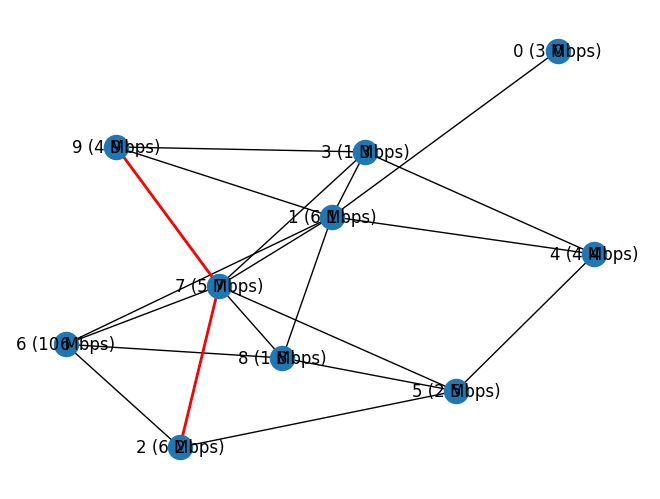

In [22]:
draw_network_graph(G, path, df)

In [23]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df1 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])

df1


node_a  node_b  bandwidth
0       2       7          5
1       7       9          4

# Dijkstra Algo


In [24]:
def dijkstra_shortest_path(source, destination, G, nodes_df):
    # Create a new graph with edge weights as the inverse of bandwidth
    G_weighted = G.copy()
    for u, v in G.edges():
        G_weighted[u][v]['weight'] = 1 / nodes_df.loc[u]['bandwidth']

    # Apply Dijkstra's algorithm on the weighted graph
    path = nx.dijkstra_path(G_weighted, source, destination, weight='weight')
    return path


In [25]:
source = 2
destination = 9
path = dijkstra_shortest_path(source_node, destination_node, G, df)
print(f"Path: {path}")

Path: [2, 7, 9]


In [26]:
def draw_network_graph(G, path, nodes_df):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth from the DataFrame
    labels = {i: f"{i} ({nodes_df.loc[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()

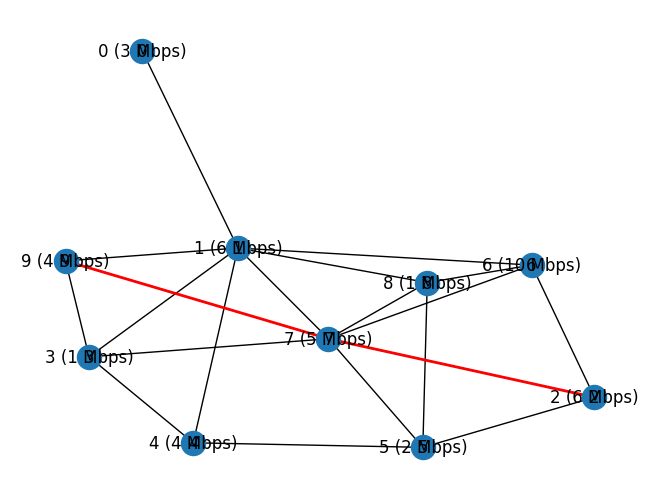

In [27]:
draw_network_graph(G, path, df)

In [28]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df2 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])
df2


node_a  node_b  bandwidth
0       2       7          5
1       7       9          4

# Genetic Algo

In [29]:
def genetic_algorithm_dijkstra_shortest_path(source, destination, G, nodes_df):
    population_size = 50
    num_generations = 100
    mutation_probability = 0.1

    def generate_individual():
        return [random.randint(0, len(nodes_df) - 1) for _ in range(random.randint(1, len(nodes_df) - 1))]

    def calculate_fitness(individual):
        fitness = 0
        for i in range(len(individual) - 1):
            start_node = individual[i]
            end_node = individual[i + 1]
            fitness += 1 / nodes_df.loc[start_node]['bandwidth']  # Use bandwidth as a fitness metric
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        fitness += 1 / nodes_df.loc[individual[-1]]['bandwidth']
        return fitness

    def selection(population):
        fitnesses = [calculate_fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        indices = np.random.choice(range(len(population)), size=len(population), p=probabilities)
        return [population[index] for index in indices]

    def crossover(parent1, parent2):
        crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2

    def mutation(individual):
        if random.random() < mutation_probability:
            index1 = random.randint(0, len(individual) - 1)
            index2 = random.randint(0, len(nodes_df) - 1)
            individual[index1] = index2

    population = [generate_individual() for _ in range(population_size)]
    for generation in range(num_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)
        population = new_population

    best_individual = min(population, key=calculate_fitness)
    best_path = [source] + best_individual + [destination]
    return best_path


In [30]:
source = 2
destination = 9
path = genetic_algorithm_dijkstra_shortest_path(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 9, 9, 6, 3, 4, 9, 4, 5, 0, 9]


In [32]:
def draw_network_graph(G, path, nodes_df):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth from the DataFrame
    labels = {i: f"{i} ({nodes_df.loc[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()

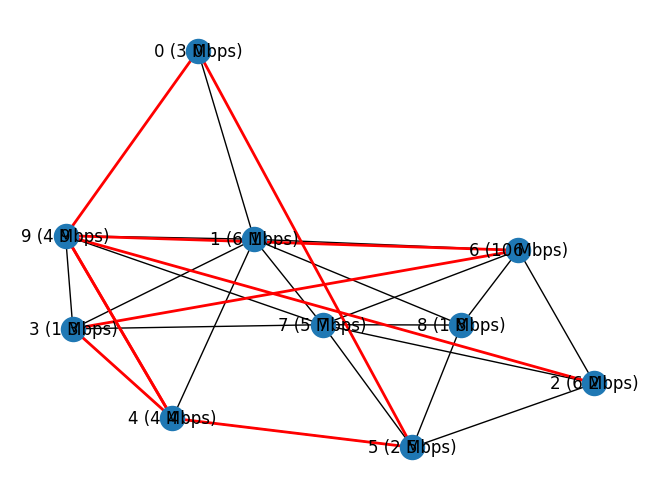

In [33]:
draw_network_graph(G, path, df)

In [34]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df3 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])
df3


node_a  node_b  bandwidth
0       2       9          4
1       9       9          4
2       9       6         10
3       6       3          1
4       3       4          4
5       4       9          4
6       9       4          4
7       4       5          2
8       5       0          3
9       0       9          4